# Project work: Analysis of the "Adult dataset" (Part Two)

### Libraries:

Importation of useful libreries for all the data analysis's steps

In [1]:
#Ordinary Libraries for Data Manipulation:
import pandas as pd
pd.set_option("float_format", "{:.2f}".format)
import numpy as np
np.set_printoptions(suppress=True)

#Libraries for plotting:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#Sklearn:
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import (train_test_split, KFold, StratifiedKFold, LeaveOneOut, cross_val_score, GridSearchCV, RandomizedSearchCV)
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn import set_config
set_config(print_changed_only = False, display = "diagram")
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

#Statsmodels:
from statsmodels.api import add_constant, OLS

#Warnings:
from warnings import filterwarnings
filterwarnings("ignore")

### Useful functions implemented:

In [2]:
import Functions
from Functions import *

### Logistic Regression

**Aim:**

The aim is to estimate some different Logistic Regressor to predict if the observations belong to the the "<=50K" modality or to the ">50K" modality of the "target" variable

To start, the previous Dataframe will be used to estimate the model and then will be analyzed the progresses obtained by making some changes both to the Dataframe used and to the parameters of the Logistic Regressor

In [3]:
#List containing the models considered as useful:
modelli = []

**First Model:**

In this model we use the previous dataset without making an undersample to balance the "target"

In [4]:
#Importation of the Dataframe after the pre-processing:

df = pd.read_csv("Dataset_Adult_Not_Balance.csv")
df

,age,education_num,hours_per_week,capital,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,workclass,marital_status,race,sex,target
0,0.03,1.13,-0.04,0.16,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.84,1.13,-2.22,-0.13,1,0,0,0,0,0,0,0,1,1,1,0,0
2,-0.04,-0.42,-0.04,-0.13,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1.06,-1.20,-0.04,-0.13,0,1,0,0,0,0,0,0,1,1,0,0,0
4,-0.78,1.13,-0.04,-0.13,0,0,0,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,-0.85,0.75,-0.20,-0.13,0,0,0,0,0,1,0,0,1,1,1,1,0
32550,0.10,-0.42,-0.04,-0.13,0,0,0,0,0,1,0,0,1,1,1,0,1
32551,1.42,-0.42,-0.04,-0.13,0,0,0,0,0,0,0,0,1,0,1,1,0
32552,-1.22,-0.42,-1.66,-0.13,0,0,0,0,0,0,0,0,1,0,1,0,0


In [7]:
#Extraction of the train and test sets:

X_train, X_test, y_train, y_test = prefitting(df)

In [8]:
#Fitting of the Logistic Regressor:

lr = LogisticRegression()
lr.fit(X = X_train, y = y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

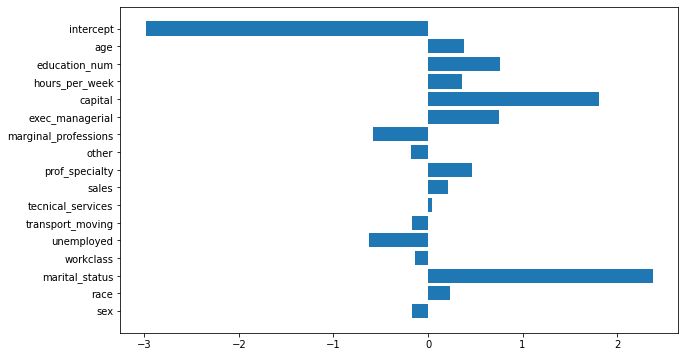

In [10]:
#Representation of the coefficients estimated:

coefficienti(lr.intercept_, lr.coef_, df)

In [11]:
y_predict = lr.predict(X = X_test)
y_predict

array([0, 1, 0, ..., 0, 1, 0])

In [12]:
#Model performance:

metriche(y_test, y_predict)

Accuracy: 0.845185071417601
------------------------------------------------------------------------------------------------------------------
Precision: 0.7287581699346405
------------------------------------------------------------------------------------------------------------------
Recall: 0.5688775510204082
------------------------------------------------------------------------------------------------------------------
f1: 0.6389684813753581
------------------------------------------------------------------------------------------------------------------


In [13]:
inserisci(modelli, y_test, y_predict, "Model not balanced")

**Second Model:**

For the second model estimated we try to balance the "target" with a manual undersampling process

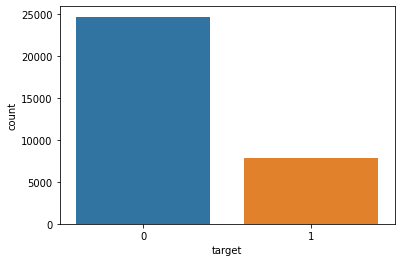

In [14]:
#Countplot to show how polarized is the 'target':

sns.countplot(data = df, x = "target")
plt.show()

In [15]:
#Extracting all the observations with target value '1':

sezione_1 = df[df.target == 1].sample(df.target.value_counts()[1])

In [16]:
#Extracting the same number of observations with target value '0':

sezione_0 = df[df.target == 0].sample(df.target.value_counts()[1])

In [17]:
#Creating a balanced Dataframe:

df_balance = sezione_0.copy()
df_balance = df_balance.merge(sezione_1, how = 'outer')
df_balance

,age,education_num,hours_per_week,capital,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,workclass,marital_status,race,sex,target
0,0.32,-0.42,-0.04,-0.13,1,0,0,0,0,0,0,0,0,0,1,1,0
1,0.03,-0.42,-0.04,-0.13,0,0,1,0,0,0,0,0,1,0,1,1,0
2,0.03,-0.42,-0.04,-0.13,0,0,1,0,0,0,0,0,1,0,1,1,0
3,-1.14,-0.03,-0.04,-0.13,0,1,0,0,0,0,0,0,1,1,1,0,0
4,-0.92,1.13,-0.04,-0.13,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,0.91,-0.42,0.37,-0.13,1,0,0,0,0,0,0,0,1,1,1,0,1
15678,1.35,-0.81,-0.04,-0.13,0,0,0,0,0,0,1,0,1,1,1,0,1
15679,-0.26,2.30,-0.04,0.85,0,0,0,1,0,0,0,0,1,1,1,0,1
15680,0.25,-0.42,-0.04,-0.13,1,0,0,0,0,0,0,0,0,1,1,0,1


In [18]:
#Showing the balance reached:

df_balance.target.value_counts()

0    7841
1    7841
Name: target, dtype: int64

In [19]:
#Shuffling the Dataframe:

df_balance = df_balance.sample(frac = 1).reset_index(drop = True)
df_balance

,age,education_num,hours_per_week,capital,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,workclass,marital_status,race,sex,target
0,-0.78,-0.03,0.77,0.90,1,0,0,0,0,0,0,0,1,1,1,0,1
1,-1.07,1.13,0.77,-0.13,1,0,0,0,0,0,0,0,1,0,1,0,0
2,0.32,1.13,0.77,-0.13,0,0,0,0,1,0,0,0,1,0,1,0,1
3,0.18,-0.03,-0.04,0.29,0,0,0,0,0,1,0,0,1,1,0,0,0
4,-1.00,1.13,1.58,-0.13,0,0,0,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,1.64,0.36,-0.04,-0.13,0,0,1,0,0,0,0,0,1,1,0,0,1
15678,1.50,1.13,-0.04,-0.13,0,0,0,1,0,0,0,0,0,1,1,0,1
15679,-0.12,1.13,-0.04,1.89,1,0,0,0,0,0,0,0,1,1,1,0,1
15680,1.20,-0.42,-0.04,-0.13,0,0,1,0,0,0,0,0,1,1,1,0,1


In [20]:
#Saving the balanced Dataset into a csv:

df_balance.to_csv("Dataset_Adult_Balance.csv", index = False)

In [23]:
X_train_b, X_test_b, y_train_b, y_test_b = prefitting(df_balance)

In [24]:
lr_b = LogisticRegression()
lr_b.fit(X = X_train_b, y = y_train_b)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

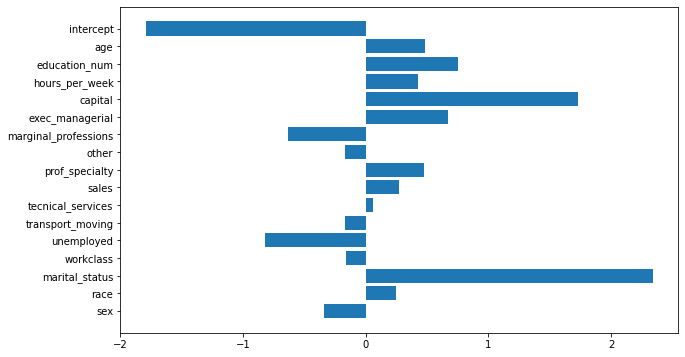

In [25]:
coefficienti(lr_b.intercept_, lr_b.coef_, df_balance)

In [26]:
y_predict_b = lr_b.predict(X = X_test_b)
y_predict_b

array([0, 1, 1, ..., 1, 1, 0])

In [27]:
metriche(y_test_b, y_predict_b)

Accuracy: 0.8116034427797258
------------------------------------------------------------------------------------------------------------------
Precision: 0.8006153846153846
------------------------------------------------------------------------------------------------------------------
Recall: 0.829719387755102
------------------------------------------------------------------------------------------------------------------
f1: 0.8149076103977451
------------------------------------------------------------------------------------------------------------------


In [28]:
inserisci(modelli, y_test_b, y_predict_b, "Model balanced")

In [29]:
#Comparison between the different models

report(modelli)

1) Model not balanced:

Accuracy: 0.845185071417601
Precision: 0.7287581699346405
Recall: 0.5688775510204082
f1: 0.6389684813753581
------------------------------------------------------------------------------------------------------------------
2) Model balanced:

				Variazione dal precedente:
Accuracy: 0.8116034427797258	(-0.03358162863787517)
Precision: 0.8006153846153846	(0.07185721468074413)
Recall: 0.829719387755102	(0.26084183673469385)
f1: 0.8149076103977451		(0.17593912902238695)
------------------------------------------------------------------------------------------------------------------


### Learning Curves


**Aim:**

We want to see how the metrics of the models change depending on the amount of data used to train the model. This will evidence if the model needs more data to boost its performances or if there's the necessity to try a more powerful model pr to modify some parameters.

**Results:**

1) The curves show that for each of the metrics estimated there's a sufficient number of observation (beacuse the values of the metrics for the Training sets are very close to the values obtained for the Validation sets).


2) There isn't an high variance for the metrics, so the model doesn't suffer an overfitting situation.

3) To reduce the bias (obtain higher values for the metrics) maybe is necessary to try another model or to review the predictors used

In [30]:
df_balance

,age,education_num,hours_per_week,capital,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,workclass,marital_status,race,sex,target
0,-0.78,-0.03,0.77,0.90,1,0,0,0,0,0,0,0,1,1,1,0,1
1,-1.07,1.13,0.77,-0.13,1,0,0,0,0,0,0,0,1,0,1,0,0
2,0.32,1.13,0.77,-0.13,0,0,0,0,1,0,0,0,1,0,1,0,1
3,0.18,-0.03,-0.04,0.29,0,0,0,0,0,1,0,0,1,1,0,0,0
4,-1.00,1.13,1.58,-0.13,0,0,0,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15677,1.64,0.36,-0.04,-0.13,0,0,1,0,0,0,0,0,1,1,0,0,1
15678,1.50,1.13,-0.04,-0.13,0,0,0,1,0,0,0,0,0,1,1,0,1
15679,-0.12,1.13,-0.04,1.89,1,0,0,0,0,0,0,0,1,1,1,0,1
15680,1.20,-0.42,-0.04,-0.13,0,0,1,0,0,0,0,0,1,1,1,0,1


In [31]:
#Determining the different sizes for the train sets:

train_sizes = np.linspace(start = 1000, stop = (df_balance.shape[0]*(80/100)), num = 10, endpoint = True, dtype = int)

In [32]:
#Feature matrix and label array:

X_b = df_balance.drop(columns = "target").values
y_b = df_balance["target"].values

In [33]:
#Learning curve for 'accuracy':

train_sizes, train_accuracy, validation_accuracy = learning_curve(
    estimator = lr_b,
    X = X_b,
    y = y_b, train_sizes = train_sizes, cv = 5,
    scoring='accuracy', shuffle = True)

In [34]:
#Learning curve for 'precision':

train_sizes, train_precision, validation_precision = learning_curve(
    estimator = lr_b,
    X = X_b,
    y = y_b, train_sizes = train_sizes, cv = 5,
    scoring = 'precision', shuffle = True)

In [35]:
#Learning curve for 'recall':

train_sizes, train_recall, validation_recall = learning_curve(
    estimator = lr_b,
    X = X_b,
    y = y_b, train_sizes = train_sizes, cv = 5,
    scoring = 'recall', shuffle = True)

In [36]:
#Learning curve for 'f1':

train_sizes, train_f1, validation_f1 = learning_curve(
    estimator = lr_b,
    X = X_b,
    y = y_b, train_sizes = train_sizes, cv = 5,
    scoring = 'f1', shuffle = True)

In [37]:
#Determining the mean values for each of the metrics:

train_accuracy_mean = train_accuracy.mean(axis=1)
validation_accuracy_mean = validation_accuracy.mean(axis=1)

train_precision_mean = train_precision.mean(axis=1)
validation_precision_mean = validation_precision.mean(axis=1)

train_recall_mean = train_recall.mean(axis=1)
validation_recall_mean = validation_recall.mean(axis=1)

train_f1_mean = train_f1.mean(axis=1)
validation_f1_mean = validation_f1.mean(axis=1)

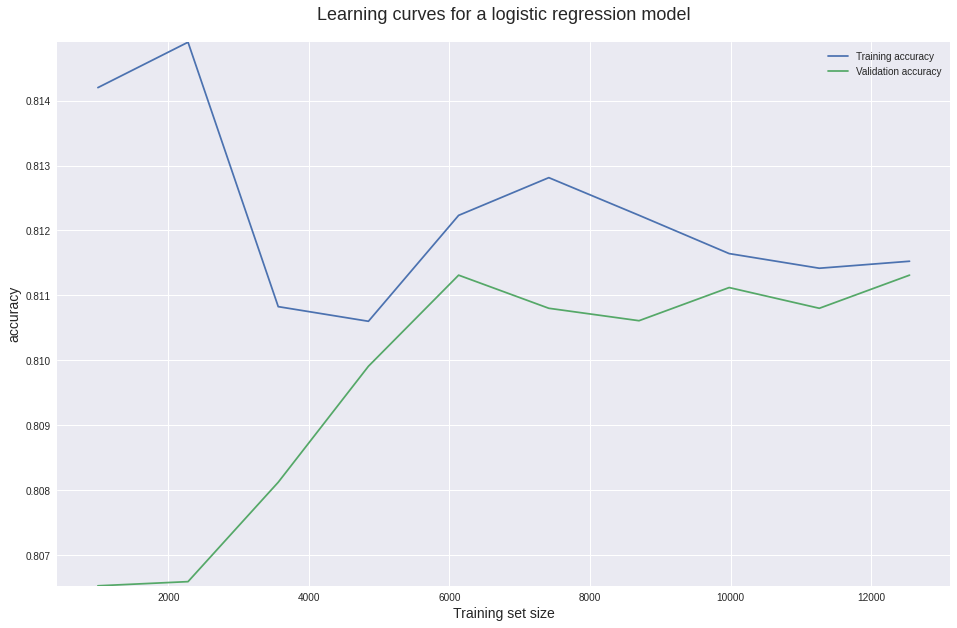

In [38]:
#Plot for 'accuracy':

plt.style.use('seaborn')
plt.figure(figsize=(16, 10))

plt.plot(train_sizes, train_accuracy_mean, label='Training accuracy')
plt.plot(train_sizes, validation_accuracy_mean, label='Validation accuracy')

plt.ylabel('accuracy', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a logistic regression model', fontsize=18, y=1.03)
plt.ylim(validation_accuracy_mean.min(), train_accuracy_mean.max())
plt.legend()
plt.show()

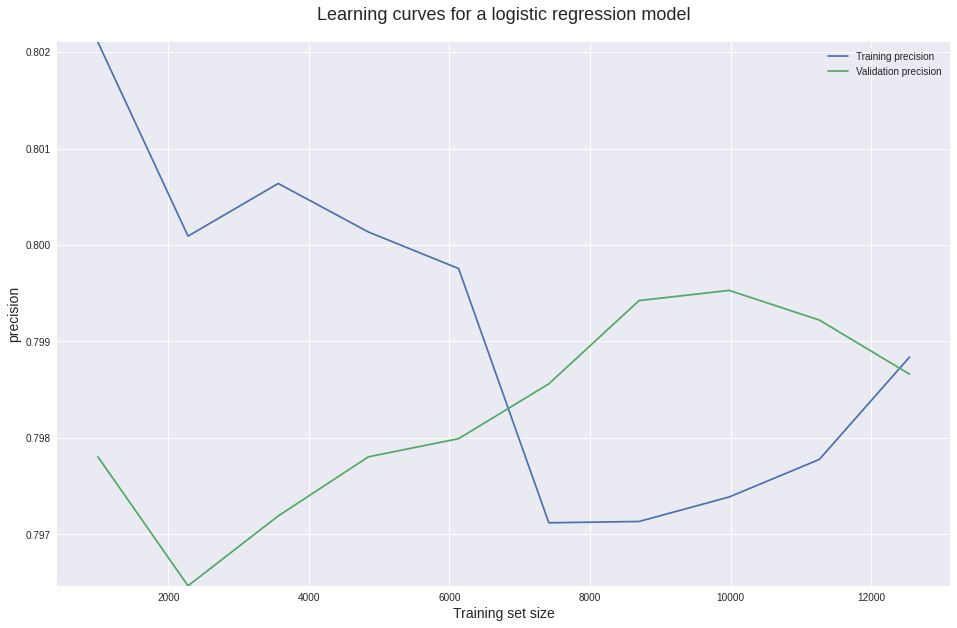

In [39]:
#Plot for 'precision':

plt.style.use('seaborn')
plt.figure(figsize=(16, 10))

plt.plot(train_sizes, train_precision_mean, label='Training precision')
plt.plot(train_sizes, validation_precision_mean, label='Validation precision')

plt.ylabel('precision', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a logistic regression model', fontsize=18, y=1.03)
plt.ylim(validation_precision_mean.min(), train_precision_mean.max())
plt.legend()
plt.show()

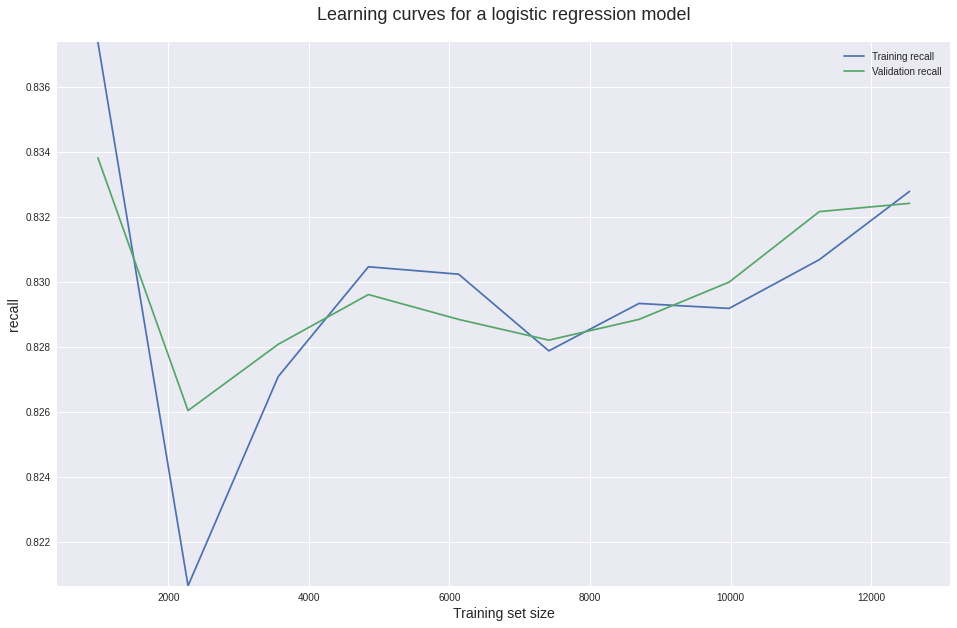

In [73]:
#Plot for 'recall':

plt.style.use('seaborn')
plt.figure(figsize=(16, 10))

plt.plot(train_sizes, train_recall_mean, label='Training recall')
plt.plot(train_sizes, validation_recall_mean, label='Validation recall')

plt.ylabel('recall', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a logistic regression model', fontsize=18, y=1.03)
plt.ylim(min(validation_recall_mean.min(), train_recall_mean.min()), max(validation_recall_mean.max(), train_recall_mean.max()))
plt.legend()
plt.show()

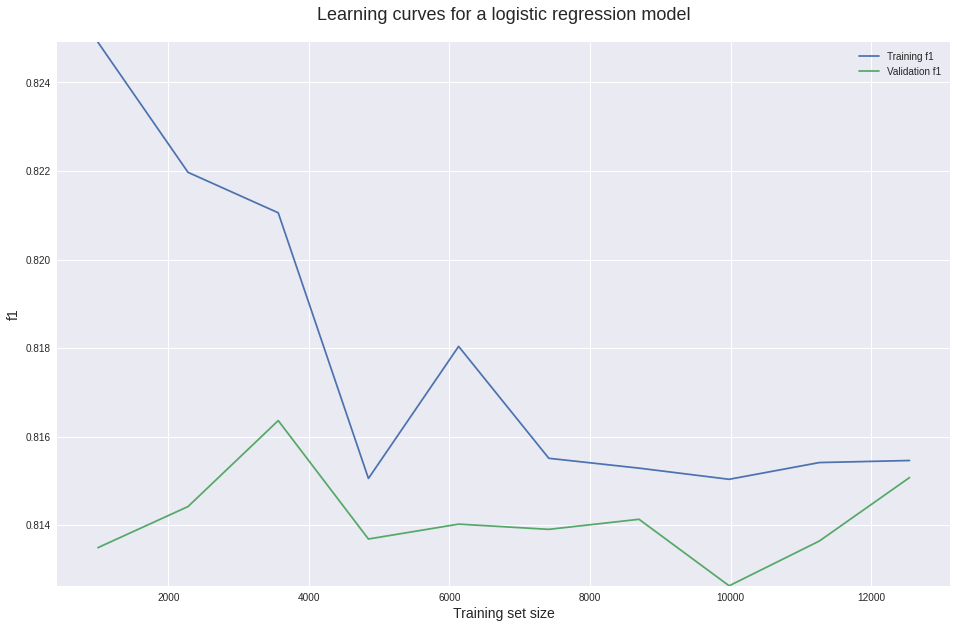

In [41]:
#Plot for 'f1':

plt.style.use('seaborn')
plt.figure(figsize=(16, 10))

plt.plot(train_sizes, train_f1_mean, label='Training f1')
plt.plot(train_sizes, validation_f1_mean, label='Validation f1')

plt.ylabel('f1', fontsize=14)
plt.xlabel('Training set size', fontsize=14)
plt.title('Learning curves for a logistic regression model', fontsize=18, y=1.03)
plt.ylim(validation_f1_mean.min(), train_f1_mean.max())
plt.legend()
plt.show()

### Validation Curves:


**Aim:**

The aim is to see (taking the not balanced dataset) how the metrics change depending on the different balance chosen for the data to support the idea that a well balanced Dataframe leads to a better prediction performance


**Results:**

1) The results show that, giving more weigth at the observations that has the value '1' for the target, there's a considerable improvement for the 'recall' score while the 'precision' score tends to decrease.


2) All considered, a Dataframe with a weight 1:2 - 1:25 is probably the best compromise to obtain reliable metrics.

In [42]:
df

,age,education_num,hours_per_week,capital,exec_managerial,marginal_professions,other,prof_specialty,sales,tecnical_services,transport_moving,unemployed,workclass,marital_status,race,sex,target
0,0.03,1.13,-0.04,0.16,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.84,1.13,-2.22,-0.13,1,0,0,0,0,0,0,0,1,1,1,0,0
2,-0.04,-0.42,-0.04,-0.13,0,1,0,0,0,0,0,0,1,0,1,0,0
3,1.06,-1.20,-0.04,-0.13,0,1,0,0,0,0,0,0,1,1,0,0,0
4,-0.78,1.13,-0.04,-0.13,0,0,0,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32549,-0.85,0.75,-0.20,-0.13,0,0,0,0,0,1,0,0,1,1,1,1,0
32550,0.10,-0.42,-0.04,-0.13,0,0,0,0,0,1,0,0,1,1,1,0,1
32551,1.42,-0.42,-0.04,-0.13,0,0,0,0,0,0,0,0,1,0,1,1,0
32552,-1.22,-0.42,-1.66,-0.13,0,0,0,0,0,0,0,0,1,0,1,0,0


In [43]:
#Determining the different 'weigth' to make different balances:

valori = np.linspace(start = 1, stop = 3, endpoint = True, num = 9)
pesi = []

for valore in valori:
    d = {
        1 : valore
    }
    pesi.append(d)
pesi

[{1: 1.0},
 {1: 1.25},
 {1: 1.5},
 {1: 1.75},
 {1: 2.0},
 {1: 2.25},
 {1: 2.5},
 {1: 2.75},
 {1: 3.0}]

In [44]:
#Regressor used in the validation curves:

lr_w = LogisticRegression()

In [45]:
train_accuracy_w, validation_accuracy_w = validation_curve(estimator = lr_w, X = X_train, y = y_train,
                                             param_name = "class_weight", param_range = pesi, 
                                             cv = 5, scoring = "accuracy", n_jobs = -1)

In [46]:
train_precision_w, validation_precision_w = validation_curve(estimator = lr_w, X = X_train, y = y_train,
                                             param_name = "class_weight", param_range = pesi, 
                                             cv = 5, scoring = "precision", n_jobs = -1)

In [47]:
train_recall_w, validation_recall_w = validation_curve(estimator = lr_w, X = X_train, y = y_train,
                                             param_name = "class_weight", param_range = pesi, 
                                             cv = 5, scoring = "recall", n_jobs = -1)

In [48]:
train_f1_w, validation_f1_w = validation_curve(estimator = lr_w, X = X_train, y = y_train,
                                             param_name = "class_weight", param_range = pesi, 
                                             cv = 5, scoring = "f1", n_jobs = -1)

In [49]:
train_accuracy_mean_w = train_accuracy_w.mean(axis=1)
validation_accuracy_mean_w = validation_accuracy_w.mean(axis=1)

train_precision_mean_w = train_precision_w.mean(axis=1)
validation_precision_mean_w = validation_precision_w.mean(axis=1)

train_recall_mean_w = train_recall_w.mean(axis=1)
validation_recall_mean_w = validation_recall_w.mean(axis=1)

train_f1_mean_w = train_f1_w.mean(axis=1)
validation_f1_mean_w = validation_f1_w.mean(axis=1)

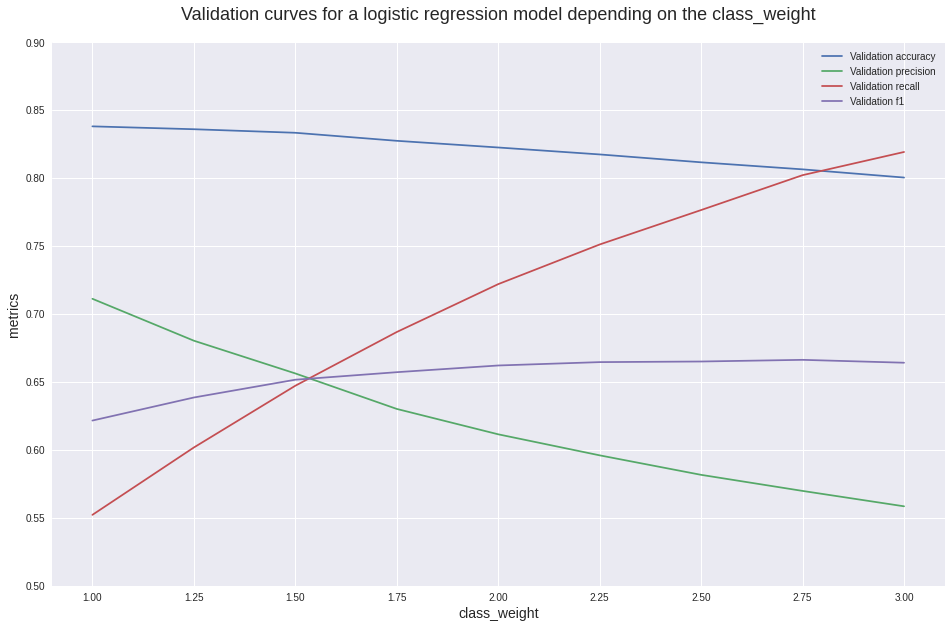

In [50]:
#Plot of the validation curves:

plt.style.use('seaborn')
plt.figure(figsize=(16, 10))

plt.plot(valori, validation_accuracy_mean_w, label='Validation accuracy')
plt.plot(valori, validation_precision_mean_w, label='Validation precision')
plt.plot(valori, validation_recall_mean_w, label='Validation recall')
plt.plot(valori, validation_f1_mean_w, label='Validation f1')

plt.ylabel('metrics', fontsize=14)
plt.xlabel('class_weight', fontsize=14)
plt.title('Validation curves for a logistic regression model depending on the class_weight', fontsize=18, y=1.03)
plt.ylim(0.5, 0.9)
plt.legend()
plt.show()

### Gridsearch

**Aim:**

The aim is to optimize the parameters of the Logistic Regressor which penalize the low significant coefficients determined in the previous models. The Dataframe used is the one with the balanced target. The Gridsearch will be done for each of the metrics of interest.

In [51]:
#Gridsearch for the parameters 'penalty' and 'C' (accuracy):

lr_GS = LogisticRegression()
stratified_kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

params = {
    "penalty": ["l2", "l1"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

gs_a = GridSearchCV(estimator = lr_GS, param_grid = params, scoring = "accuracy", n_jobs = -1, cv = stratified_kfold)
gs_a.fit(X = X_train_b, y = y_train_b)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [52]:
#Getting the best estimator found:

lr_GS_a = gs_a.best_estimator_
lr_GS_a

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
#Predictions:

y_predict_GS_a = lr_GS_a.predict(X_test_b)

In [54]:
#Performances of the model:

metriche(y_test_b, y_predict_GS_a)

Accuracy: 0.8122409945808097
------------------------------------------------------------------------------------------------------------------
Precision: 0.800860479409957
------------------------------------------------------------------------------------------------------------------
Recall: 0.8309948979591837
------------------------------------------------------------------------------------------------------------------
f1: 0.8156494522691705
------------------------------------------------------------------------------------------------------------------


In [55]:
#Insert the model in the list:
inserisci(modelli, y_test_b, y_predict_GS_a, "Gridsearch (accuracy)")

In [56]:
#Gridsearch for the parameters 'penalty' and 'C' (precision):

gs_p = GridSearchCV(estimator = lr_GS, param_grid = params, scoring = "precision", n_jobs = -1, cv = stratified_kfold)
gs_p.fit(X = X_train_b, y = y_train_b)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='precision', verbose=0)

In [57]:
lr_GS_p = gs_p.best_estimator_
lr_GS_p

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_predict_GS_p = lr_GS_p.predict(X_test_b)

In [59]:
metriche(y_test_b, y_predict_GS_p)

Accuracy: 0.8122409945808097
------------------------------------------------------------------------------------------------------------------
Precision: 0.800860479409957
------------------------------------------------------------------------------------------------------------------
Recall: 0.8309948979591837
------------------------------------------------------------------------------------------------------------------
f1: 0.8156494522691705
------------------------------------------------------------------------------------------------------------------


In [60]:
inserisci(modelli, y_test_b, y_predict_GS_p, "Gridsearch (precision)")

In [61]:
#Gridsearch for the parameters 'penalty' and 'C' (recall):

gs_r = GridSearchCV(estimator = lr_GS, param_grid = params, scoring = "recall", n_jobs = -1, cv = stratified_kfold)
gs_r.fit(X = X_train_b, y = y_train_b)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [62]:
lr_GS_r = gs_r.best_estimator_
lr_GS_r

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_predict_GS_r = lr_GS_r.predict(X_test_b)

In [64]:
metriche(y_test_b, y_predict_GS_r)

Accuracy: 0.8122409945808097
------------------------------------------------------------------------------------------------------------------
Precision: 0.800860479409957
------------------------------------------------------------------------------------------------------------------
Recall: 0.8309948979591837
------------------------------------------------------------------------------------------------------------------
f1: 0.8156494522691705
------------------------------------------------------------------------------------------------------------------


In [65]:
inserisci(modelli, y_test_b, y_predict_GS_r, "Gridsearch (recall)")

In [66]:
#Gridsearch for the parameters 'penalty' and 'C' (f1):

gs_f = GridSearchCV(estimator = lr_GS, param_grid = params, scoring = "f1", n_jobs = -1, cv = stratified_kfold)
gs_f.fit(X = X_train_b, y = y_train_b)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2', 'l1']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [67]:
lr_GS_f = gs_f.best_estimator_
lr_GS_f

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
y_predict_GS_f = lr_GS_f.predict(X_test_b)

In [69]:
metriche(y_test_b, y_predict_GS_f)

Accuracy: 0.8122409945808097
------------------------------------------------------------------------------------------------------------------
Precision: 0.800860479409957
------------------------------------------------------------------------------------------------------------------
Recall: 0.8309948979591837
------------------------------------------------------------------------------------------------------------------
f1: 0.8156494522691705
------------------------------------------------------------------------------------------------------------------


In [70]:
inserisci(modelli, y_test_b, y_predict_GS_f, "Gridsearch (f1)")

### Final summary of the Logistic Regressors estimated


**Conclusions:**

1) The initial model estimated in a polarized Dataframe leads to a non sufficient value for most ofthe metrics used to evaluate the performance of the model.


2) Making and undersampling, there's a decline of the total 'accuracy' but it's completely compensated by the improvement seen for the other metrics.


3) The Gridsearches doesn't boost the model performances very much.

In [71]:
report(modelli)

1) Model not balanced:

Accuracy: 0.845185071417601
Precision: 0.7287581699346405
Recall: 0.5688775510204082
f1: 0.6389684813753581
------------------------------------------------------------------------------------------------------------------
2) Model balanced:

				Variazione dal precedente:
Accuracy: 0.8116034427797258	(-0.03358162863787517)
Precision: 0.8006153846153846	(0.07185721468074413)
Recall: 0.829719387755102	(0.26084183673469385)
f1: 0.8149076103977451		(0.17593912902238695)
------------------------------------------------------------------------------------------------------------------
3) Gridsearch (accuracy):

				Variazione dal precedente:
Accuracy: 0.8122409945808097	(0.0006375518010838244)
Precision: 0.800860479409957	(0.0002450947945723536)
Recall: 0.8309948979591837	(0.0012755102040816757)
f1: 0.8156494522691705		(0.0007418418714254527)
------------------------------------------------------------------------------------------------------------------
4) Gridsear